In [11]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from latex import latexify, format_axes
%matplotlib inline
# Retina
%config InlineBackend.figure_format = 'retina'

latexify()

np.random.seed(42)
num_average_time = 100  # Number of times to run each experiment to calculate the average values


# Function to create fake data (take inspiration from usage.py)
def give_data(category, N, P):
    # category:
    # 1 -> RIRO
    # 2 -> RIDO
    # 3 -> DIDO
    # 4 -> DIRO
    
    if (category == 1):
        X = pd.DataFrame(np.random.randn(N, P), dtype = "float")
        y = pd.Series(np.random.randn(N), dtype = "float")
        
    elif (category == 2):
        X = pd.DataFrame(np.random.randn(N, P), dtype = "float")
        y = pd.Series(np.random.randint(P, size = N), dtype = "category")
        
    elif (category == 3):
        X = pd.DataFrame({i: pd.Series(np.random.randint(P, size = N), dtype = "category") for i in range(5)})
        y = pd.Series(np.random.randint(P, size = N), dtype = "category")
        
    elif (category == 4):
        X = pd.DataFrame({i: pd.Series(np.random.randint(P, size = N), dtype = "category") for i in range(5)})
        y = pd.Series(np.random.randn(N), dtype = "float")
    
    
    return X, y
# ...
# Function to calculate average time (and std) taken by fit() and predict() for different N and P for 4 different cases of DTs
def time_data(manyX, manyY, category):
    TimeFit, TimePredict, Shapes = [], [], []
    for X, y in zip(manyX, manyY):
        ### HERE ADD OUR TREE
        model = DecisionTree()
        t1 = time.time()
        model.fit(X, y)
        t2 = time.time()
        T1 = t2 - t1
        
        t3 = time.time()
        y_hat = model.predict(X)
        t4 = time.time()
        T2 = t4 - t3
        
        M, N = X.shape[0], X.shape[1]
        TimeFit.append(T1)
        TimePredict.append(T2)
        Shapes.append(f"(M: {M}, N: {N})")


    
    return np.array(TimeFit), np.array(TimePredict), np.array(Shapes), np.mean(TimeFit), np.std(TimeFit), np.mean(TimePredict), np.std(TimePredict)
    
    
    
# ...
# Function to plot the results
def plot_result(TimeFit, TimePredict):
    plt.figure(figsize = (10, 6))
    plt.plot(range(len(TimeFit)), TimeFit, color = "r", marker = "o")
    plt.xlabel("Model Number")
    plt.ylabel("Fitting Time (s)")
    plt.title("Fitting Times for different models")
    plt.legend([f"Average : {np.mean(TimeFit)}\nStd: {np.std(TimeFit)}"], fontsize = 12)
    plt.grid()
    plt.show()
    
    plt.figure(figsize = (10, 6))
    plt.plot(range(len(TimePredict)), TimePredict, color = "g", marker = "s")
    plt.xlabel("Model Number")
    plt.ylabel("Predicting Time (s)")
    plt.title("Predicting Times for different models")
    plt.legend([f"Average : {np.mean(TimePredict)}\nStd: {np.std(TimePredict)}"], fontsize = 12)
    plt.grid()
    plt.show()



# ...
# Other functions
# ...
# Run the functions, Learn the DTs and Show the results/plots


# category:
# 1 -> RIRO
# 2 -> RIDO
# 3 -> DIDO
# 4 -> DIRO

XsRIRO, ysRIRO = [], []
XsRIDO, ysRIDO = [], []
XsDIDO, ysDIDO = [], []
XsDIRO, ysDIRO = [], []
for i in range(num_average_time):
    N, P = np.random.randint(low = 20, high = 50), np.random.randint(low = 3, high = 15)
    X1, y1 = give_data(1, N, P)
    X2, y2 = give_data(2, N, P)
    X3, y3 = give_data(3, N, P)
    X4, y4 = give_data(4, N, P)
    XsRIRO.append(X1)
    ysRIRO.append(y1)
    
    XsRIDO.append(X2)
    ysRIDO.append(y2)
    
    XsDIDO.append(X3)
    ysDIDO.append(y3)
    
    XsDIRO.append(X4)
    ysDIRO.append(y4)
    

## RIRO

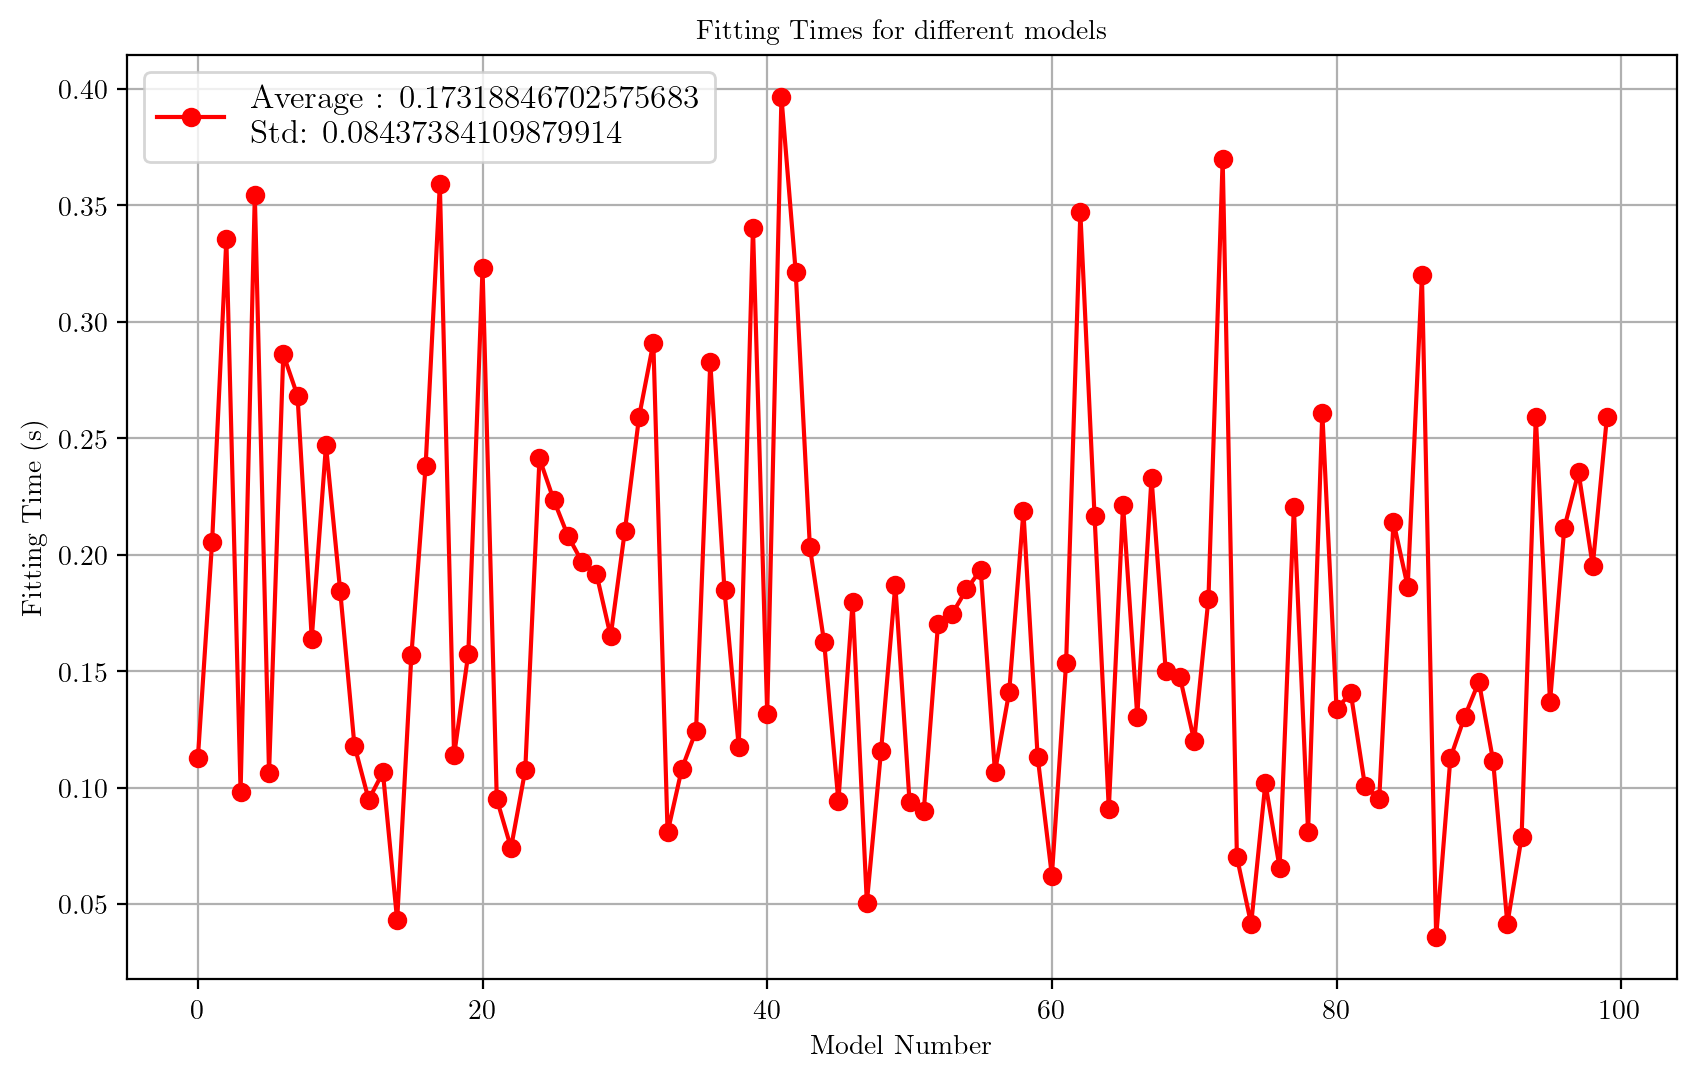

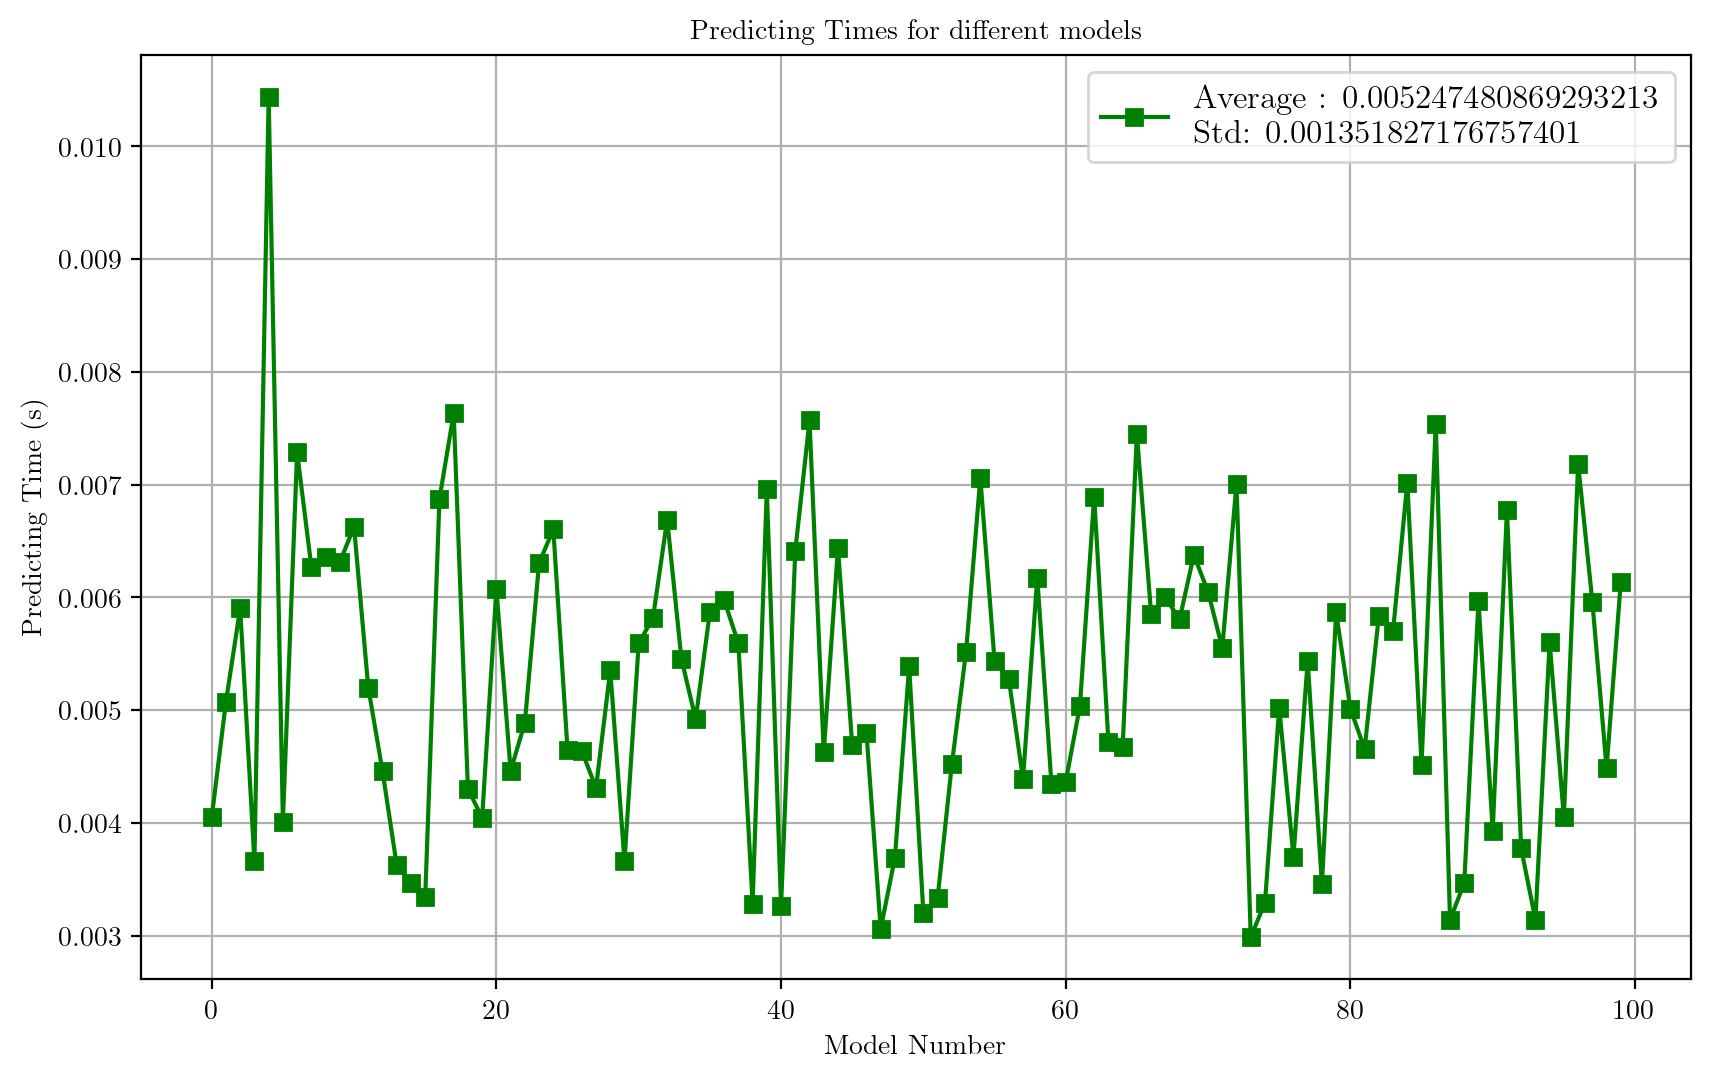

In [12]:
res1 = time_data(XsRIRO, ysRIRO, 1)
plot_result(res1[0], res1[1])

## RIDO

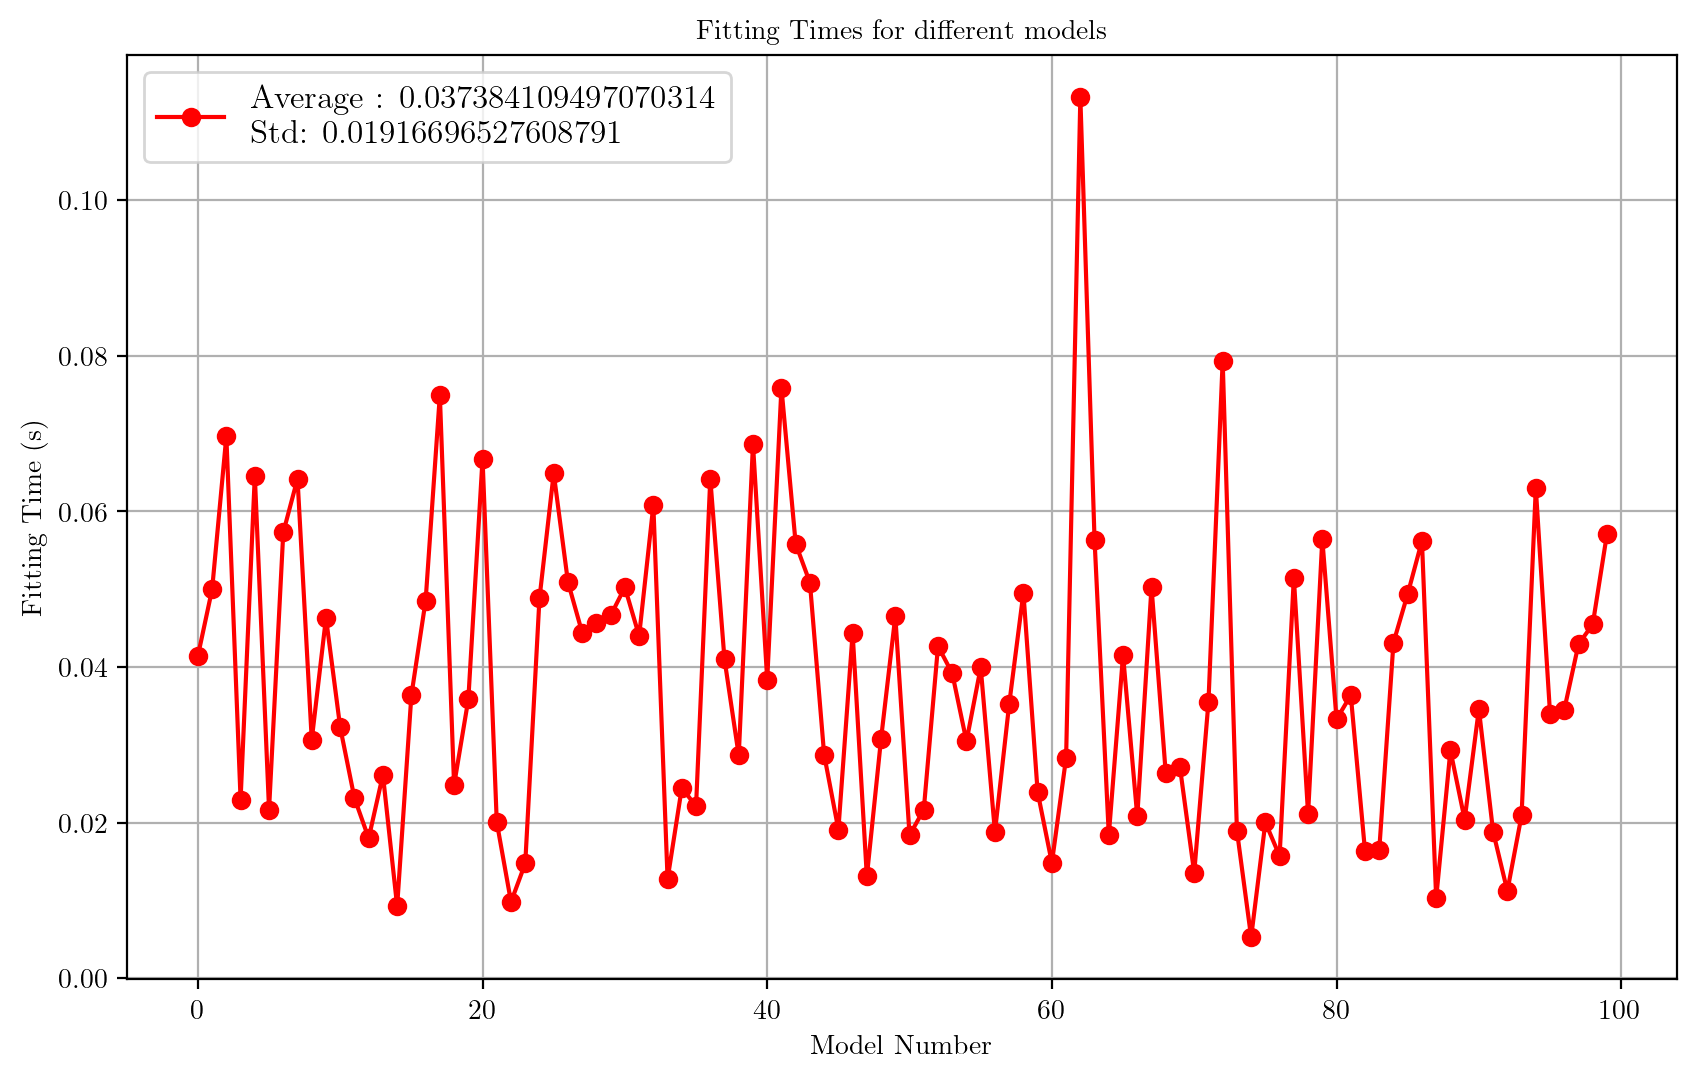

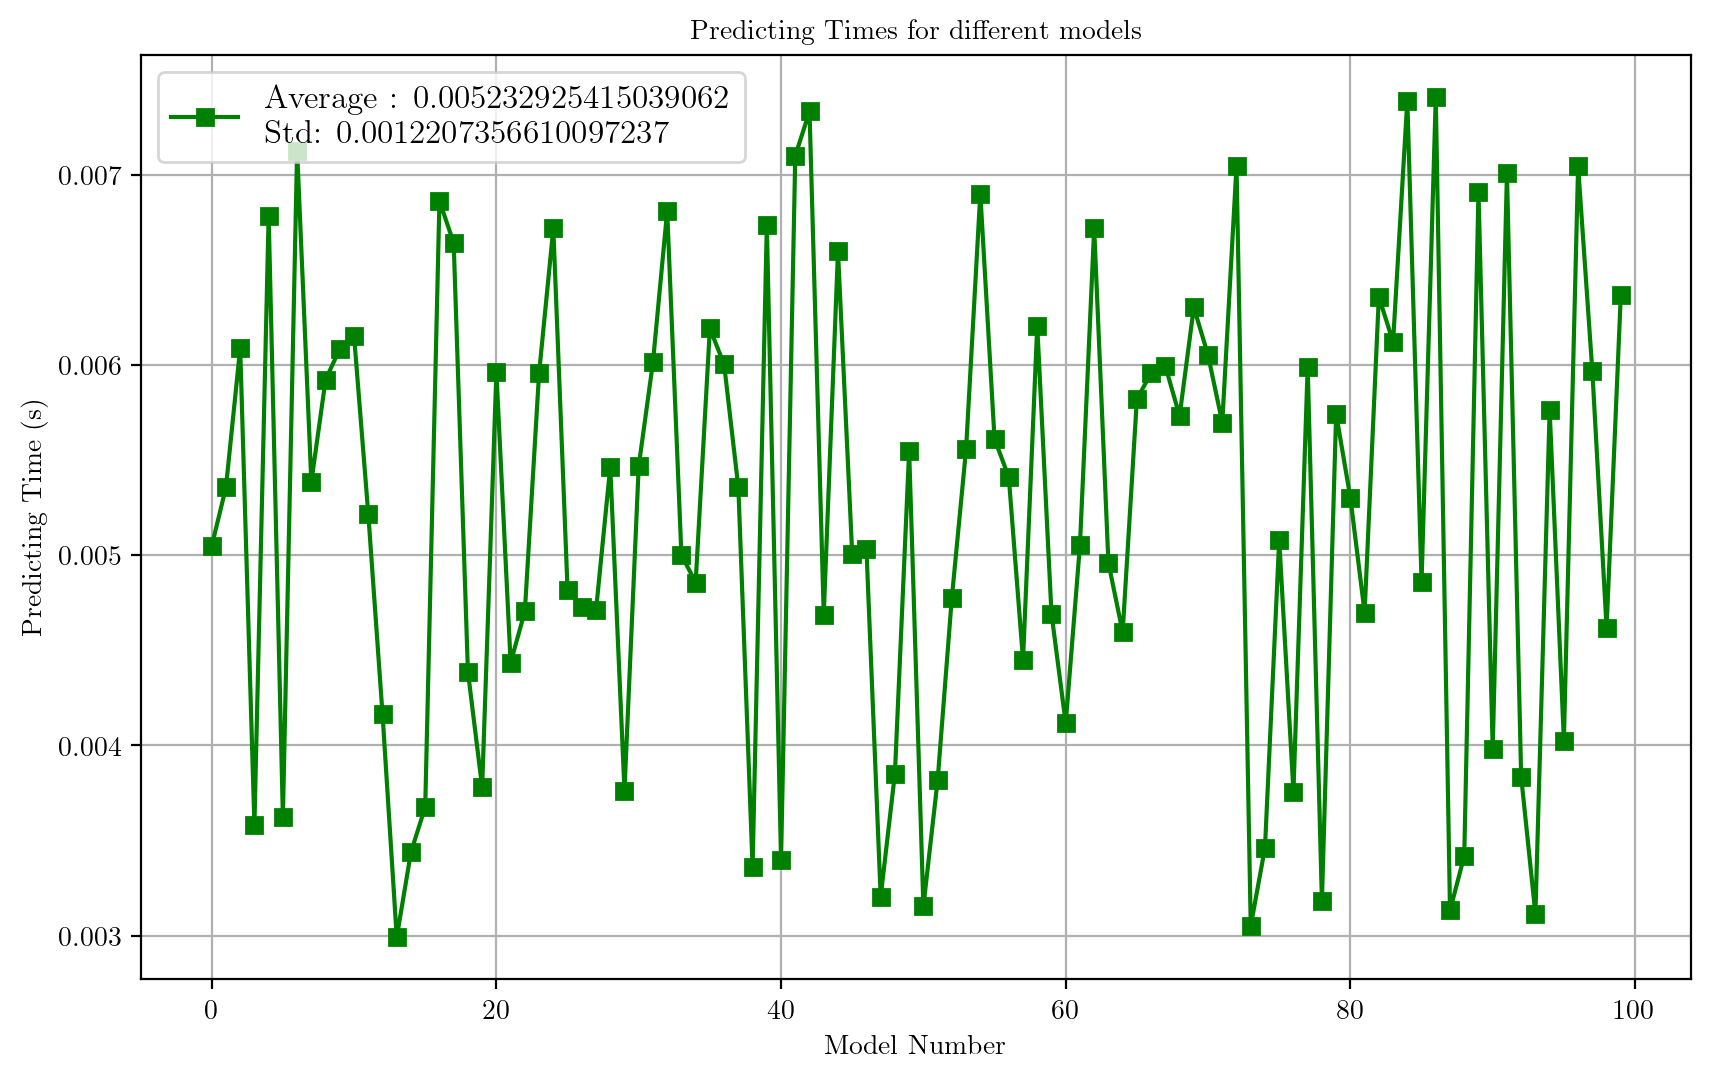

In [13]:
res2 = time_data(XsRIDO, ysRIDO, 2)
plot_result(res2[0], res2[1])

## DIDO

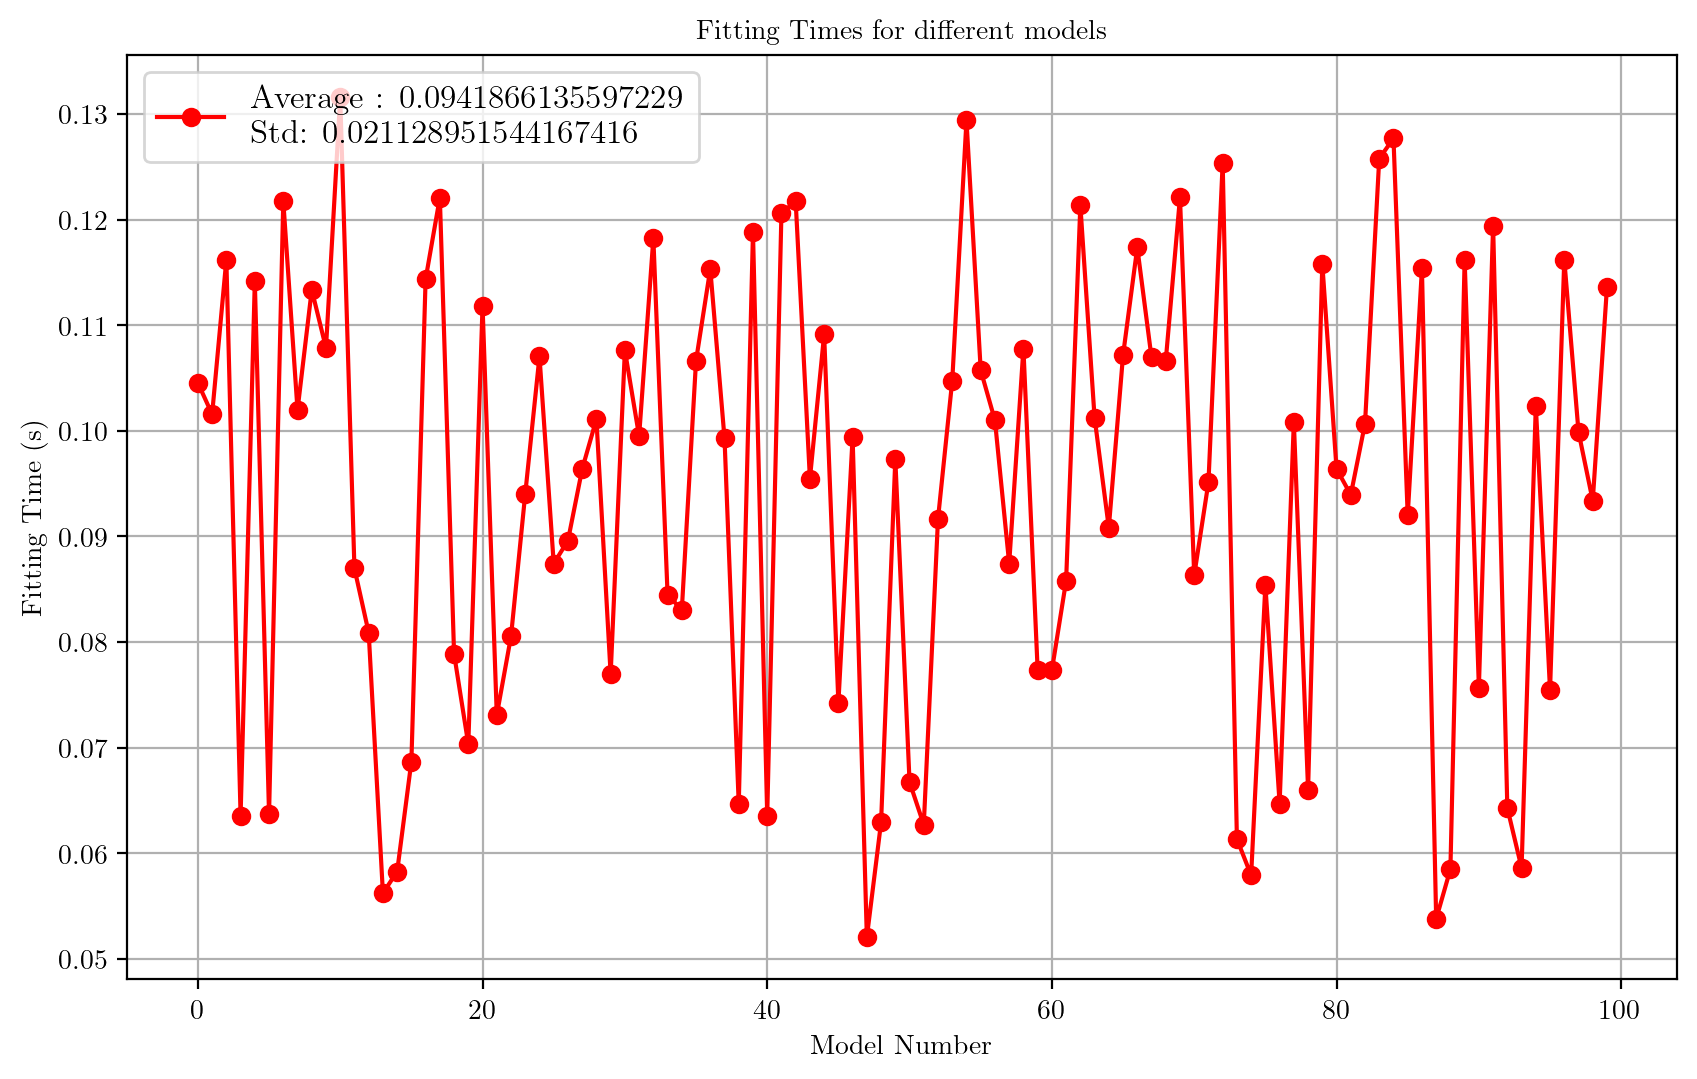

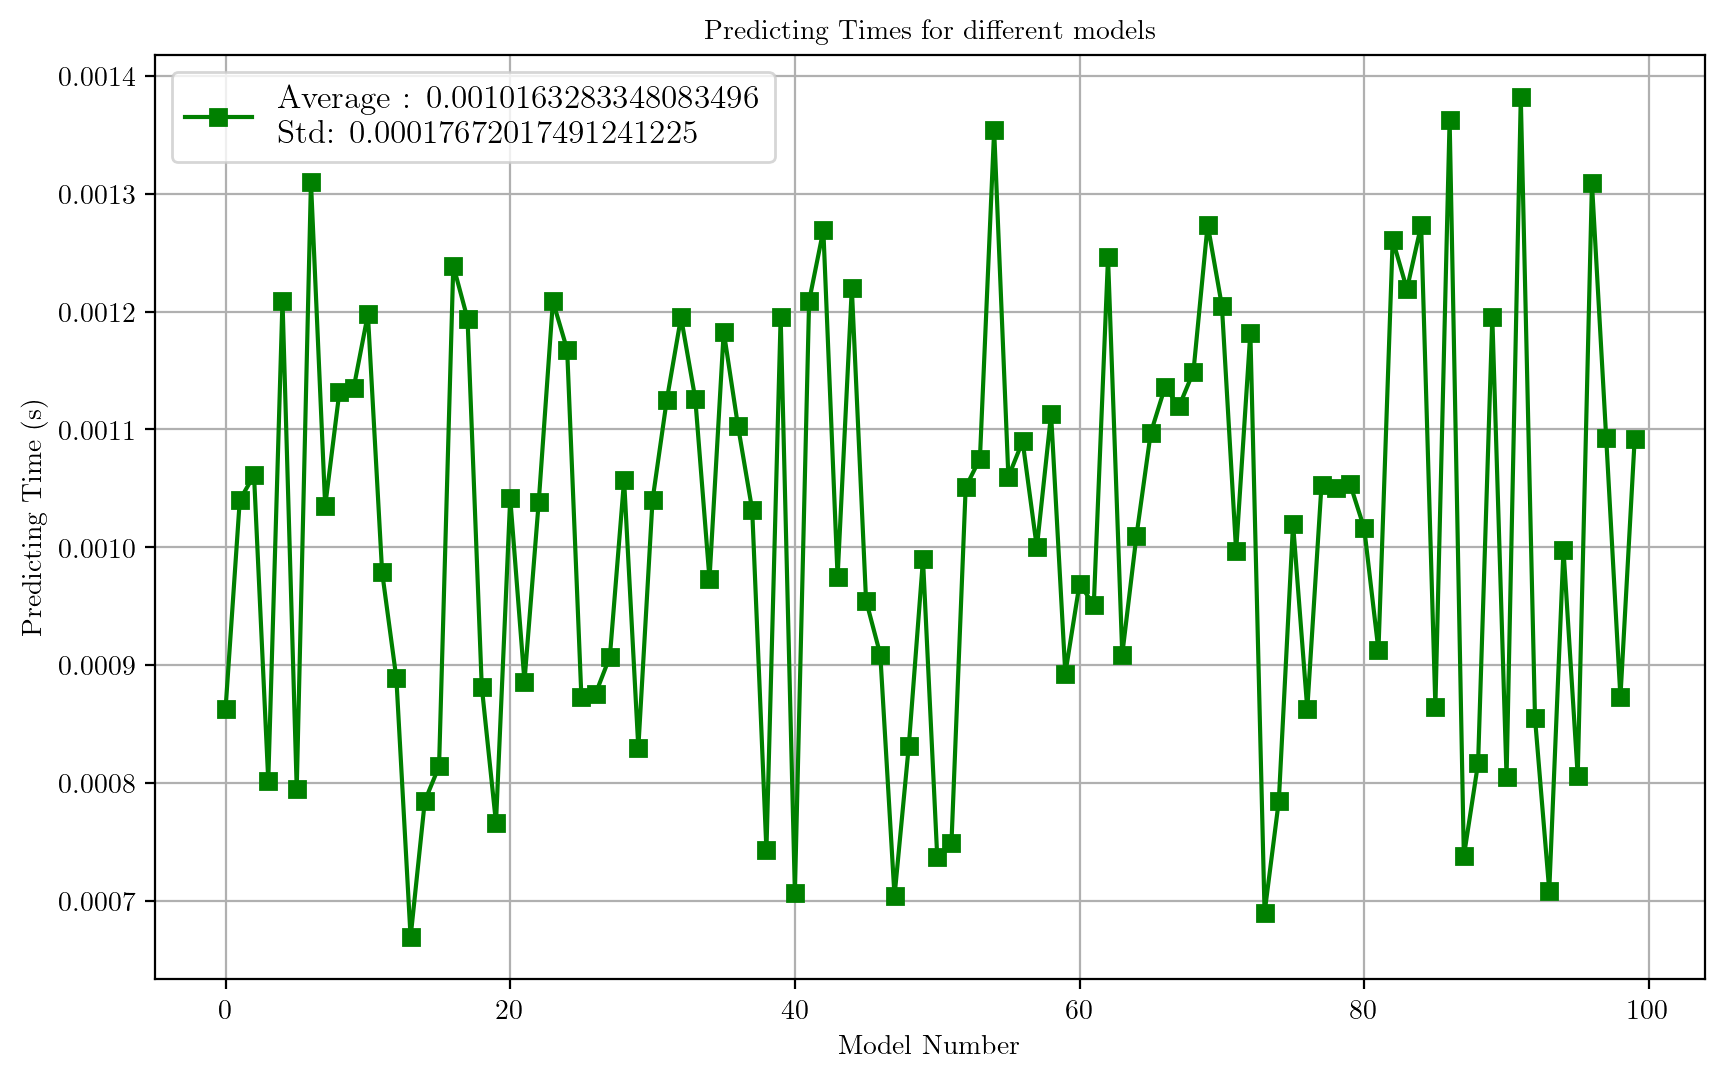

In [14]:
res3 = time_data(XsDIDO, ysDIDO, 3)
plot_result(res3[0], res3[1])

## DIRO

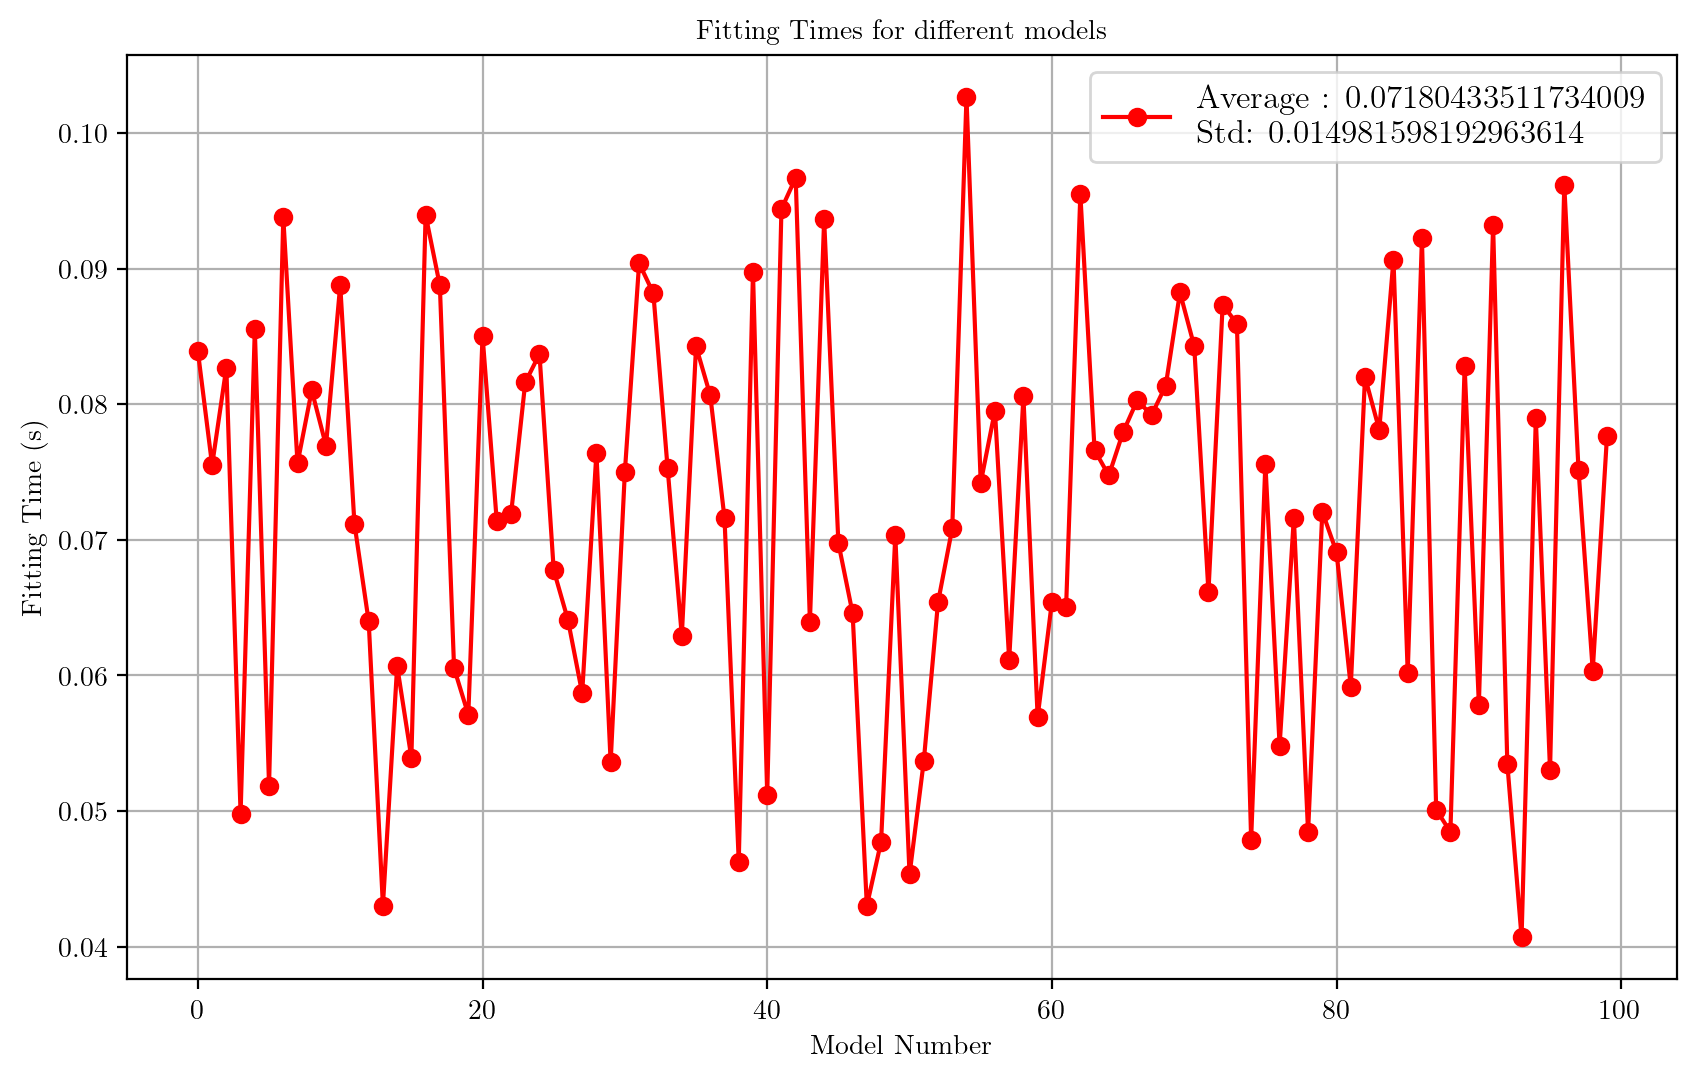

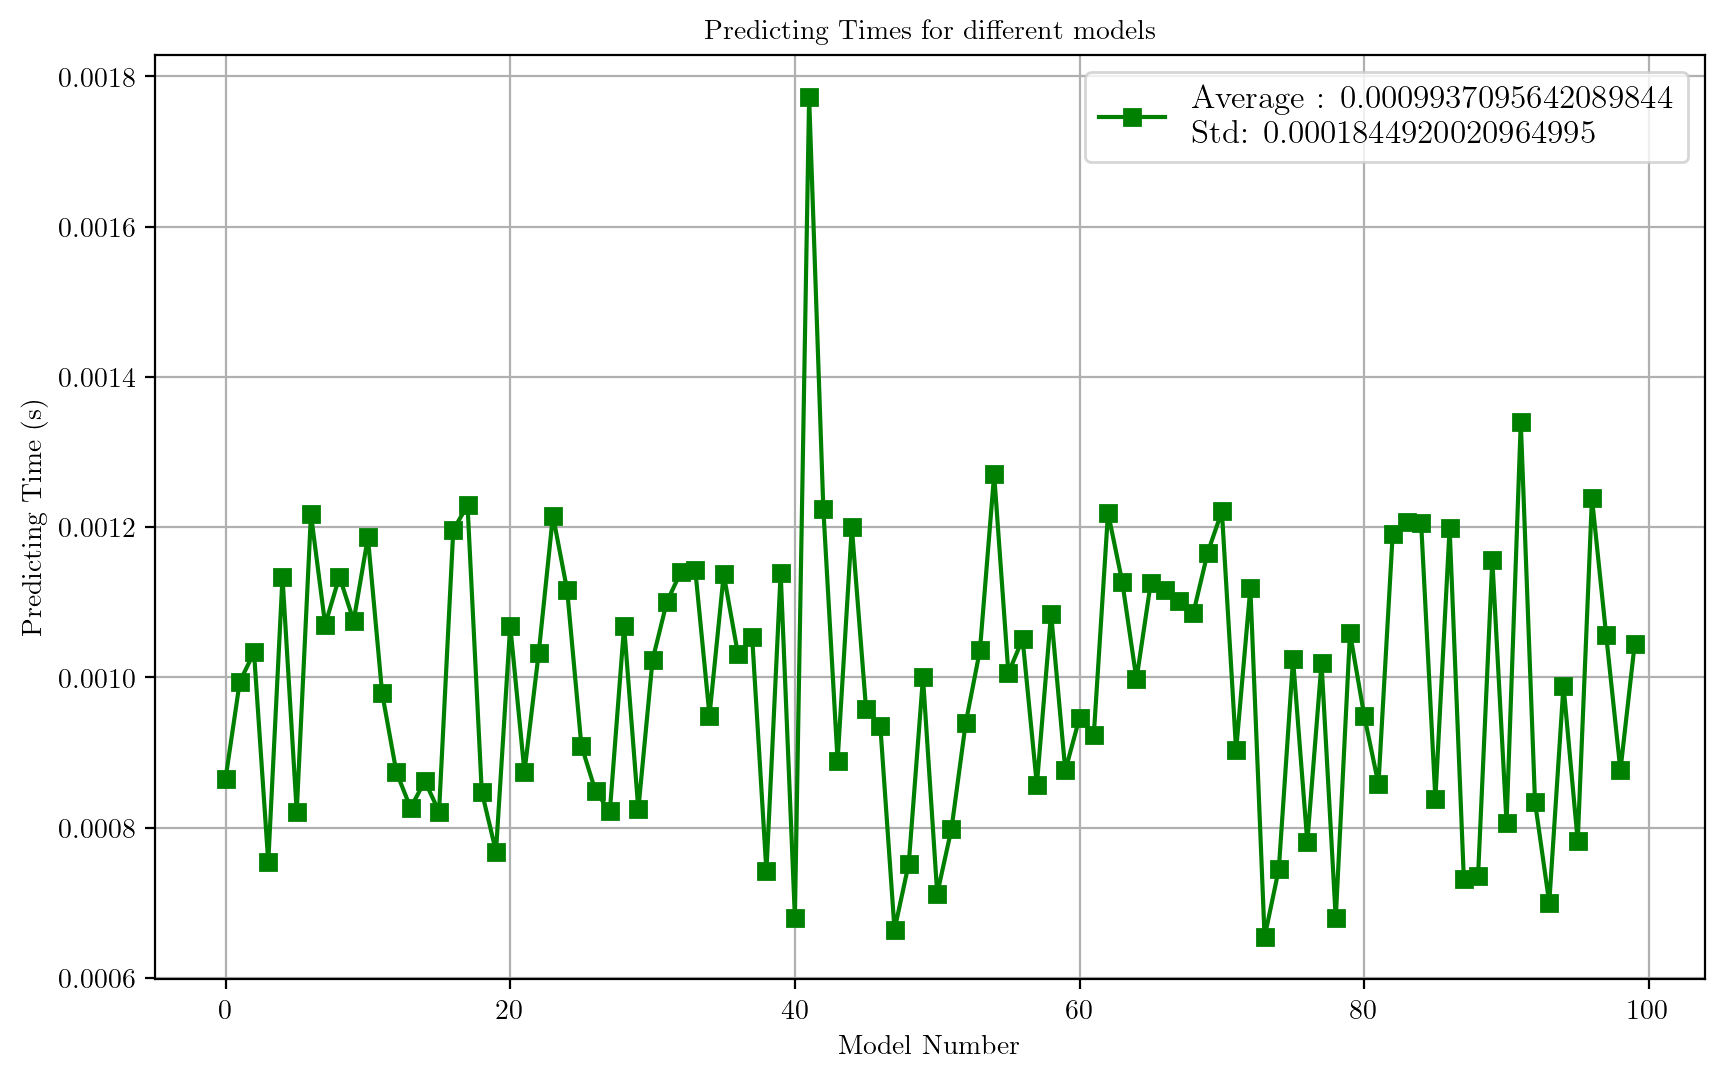

In [15]:
res4 = time_data(XsDIRO, ysDIRO, 4)
plot_result(res4[0], res4[1])

In [16]:
meansFit, stdsFit, meansPred, stdsPred = {}, {}, {}, {}
res = [res1, res2, res3, res4]
for i, name  in enumerate(["RIRO", "RIDO", "DIDO", "DIRO"]):
    meansFit[name] = res[i][3]
    stdsFit[name] = res[i][4]
    meansPred[name] = res[i][5]
    stdsPred[name] = res[i][6]

meansF = pd.Series(meansFit)
meansP = pd.Series(meansPred)
stdF = pd.Series(stdsFit)
stdP = pd.Series(stdsPred)

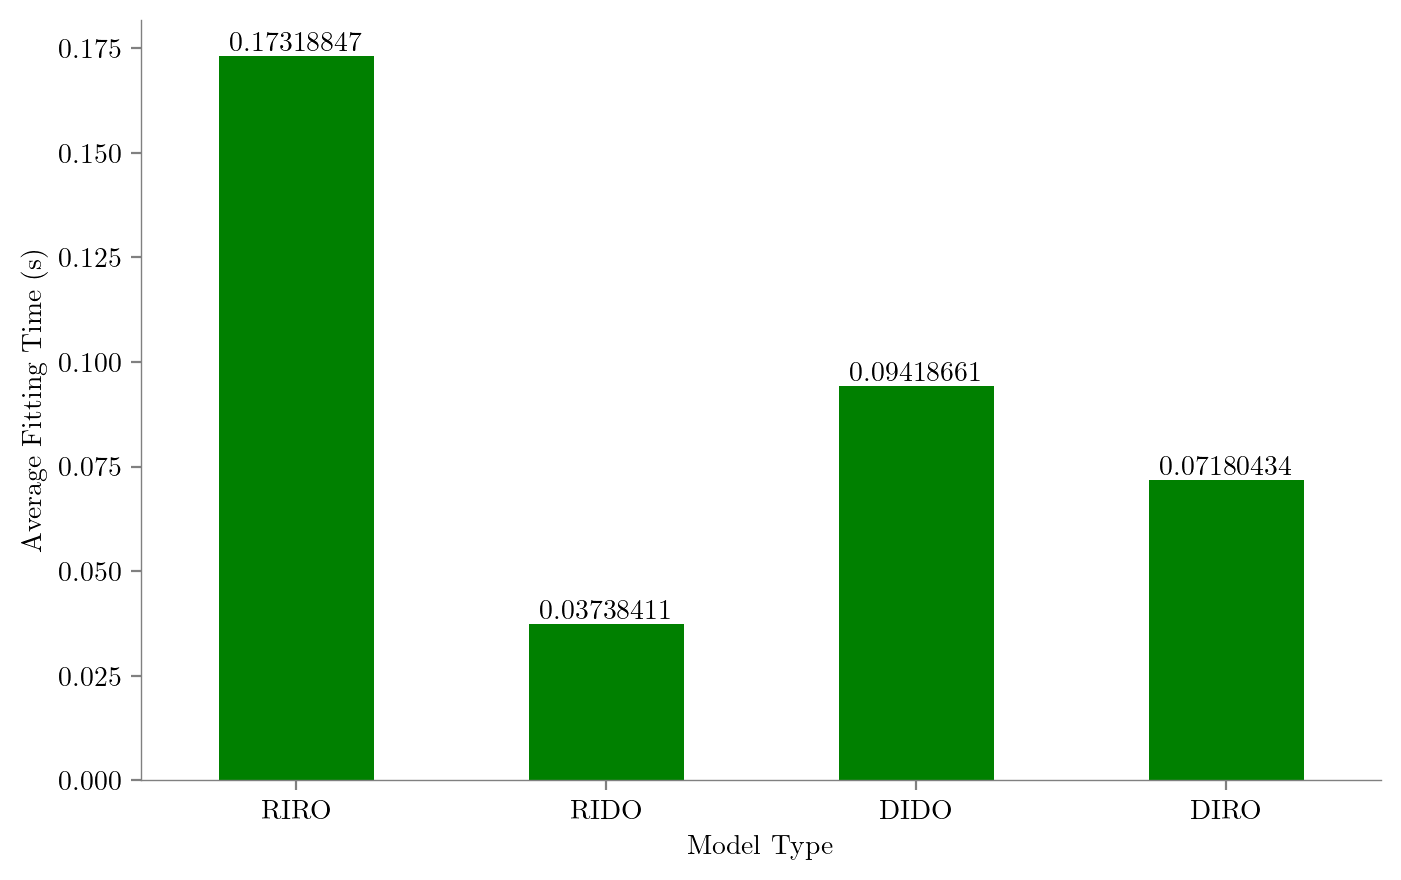

In [17]:
latexify(fig_width = 8)
bars = meansF.plot(kind = "bar", rot = 0, color = "g")
format_axes(plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 8), ha = "center", va = "bottom")

plt.xlabel("Model Type")
plt.ylabel("Average Fitting Time (s)")
plt.show()

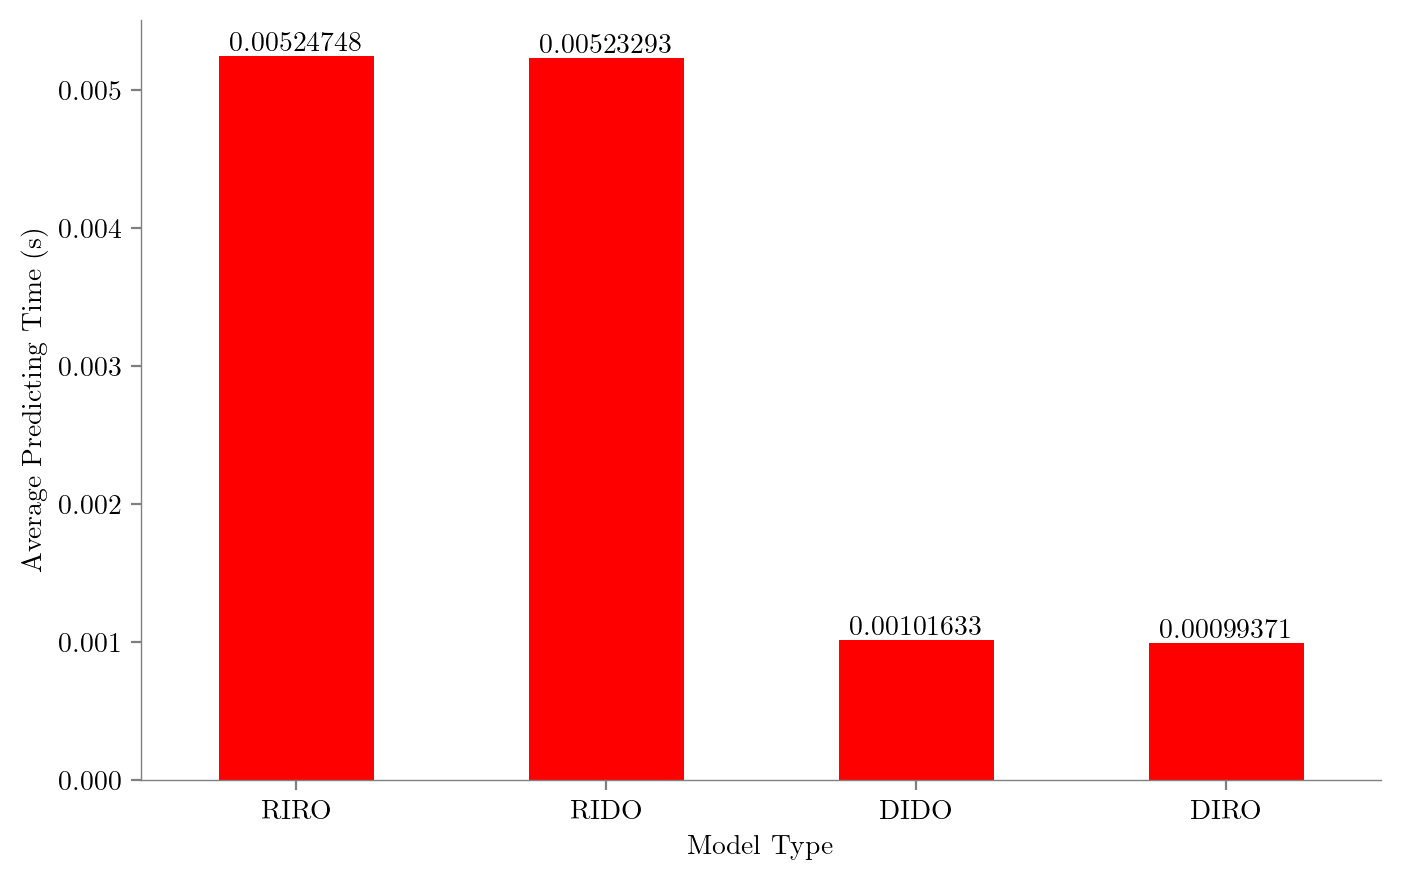

In [18]:
latexify(fig_width = 8)
bars = meansP.plot(kind = "bar", rot = 0, color = "r")
format_axes(plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 8), ha = "center", va = "bottom")

plt.xlabel("Model Type")
plt.ylabel("Average Predicting Time (s)")
plt.show()

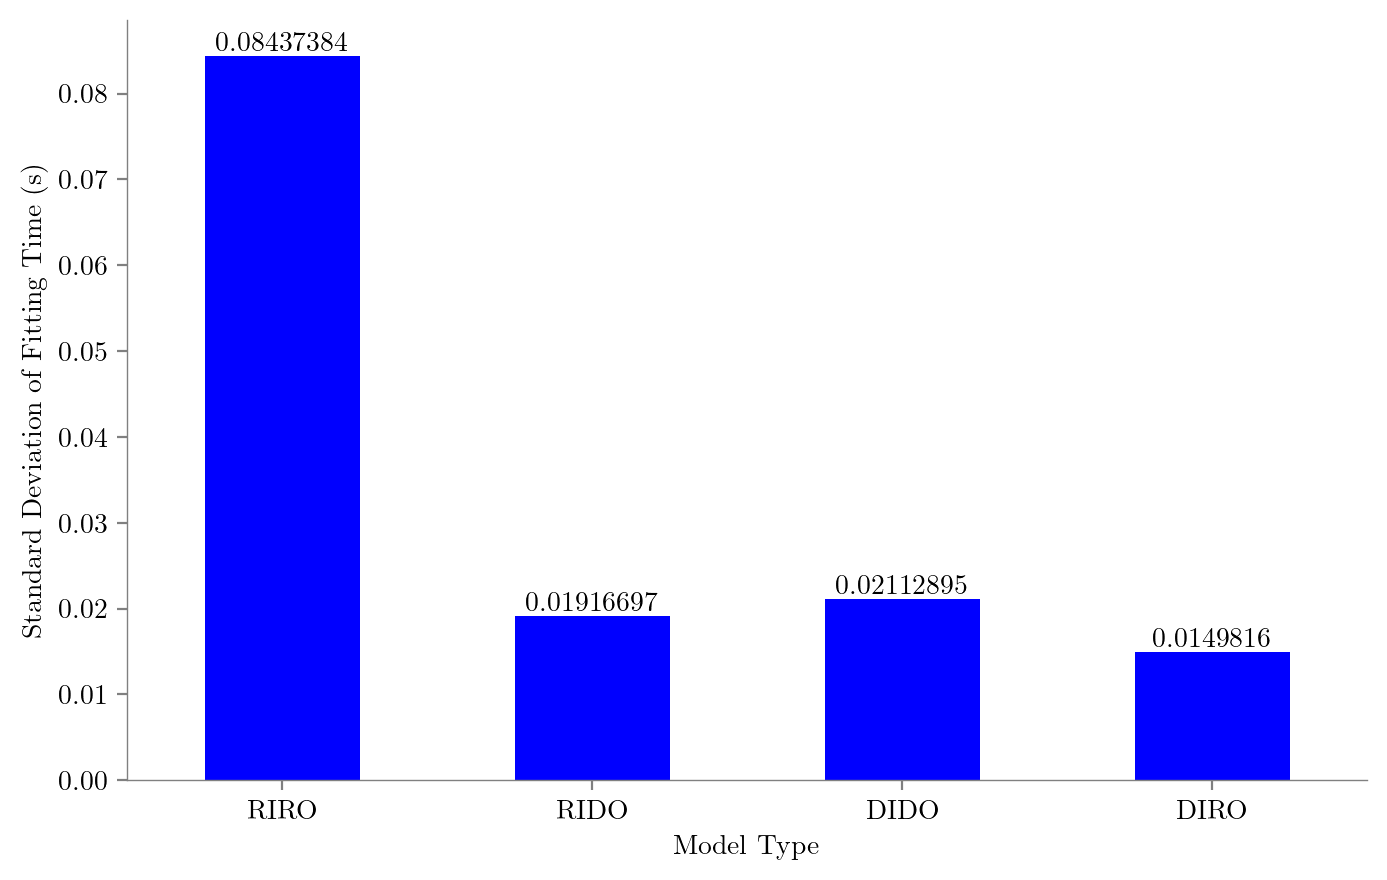

In [19]:
latexify(fig_width = 8)
bars = stdF.plot(kind = "bar", rot = 0, color = "b")
format_axes(plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 8), ha = "center", va = "bottom")

plt.xlabel("Model Type")
plt.ylabel("Standard Deviation of Fitting Time (s)")
plt.show()

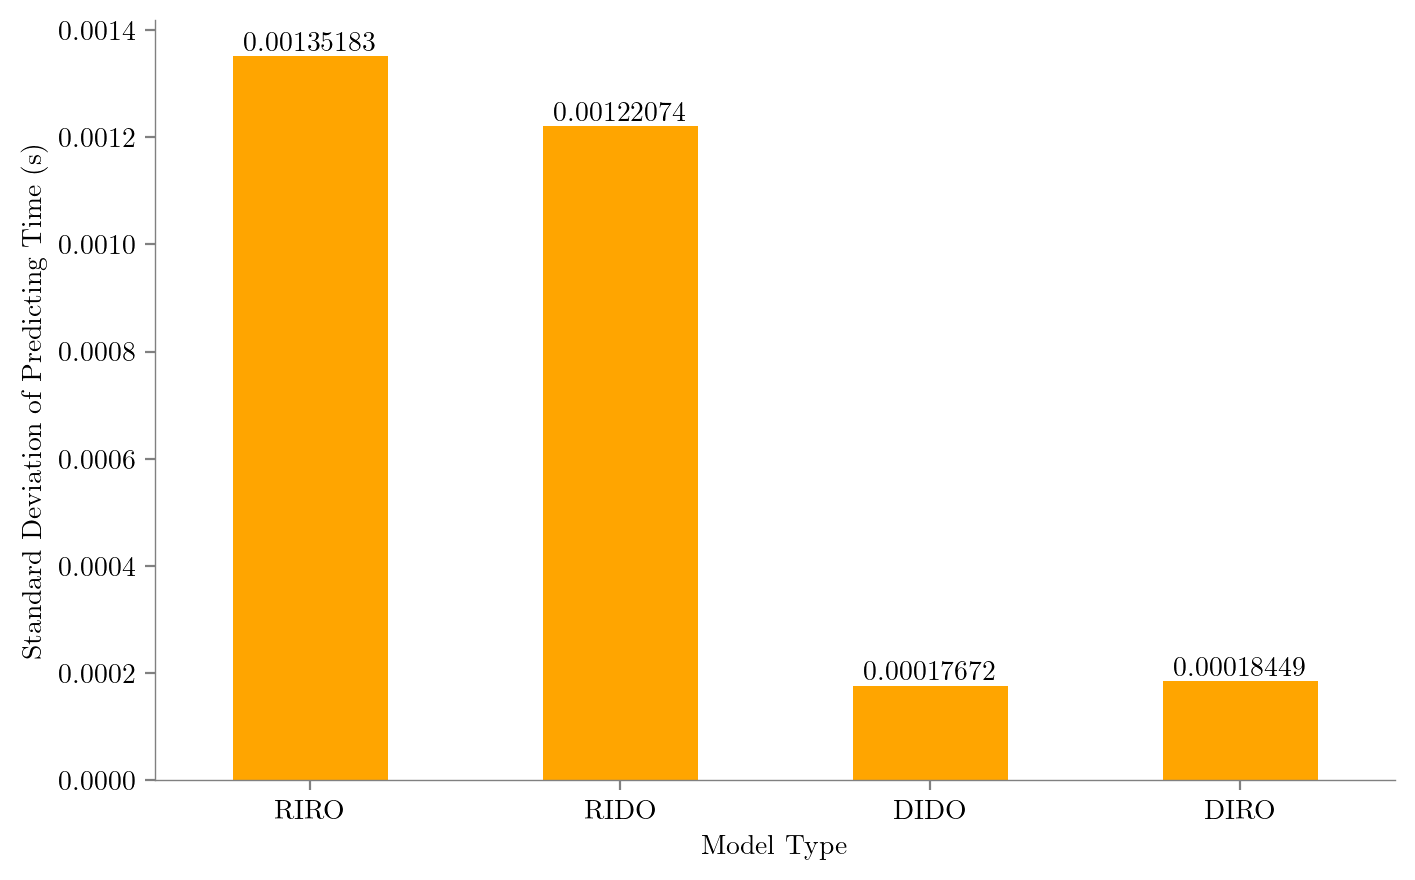

In [20]:
latexify(fig_width = 8)
bars = stdP.plot(kind = "bar", rot = 0, color = "orange")
format_axes(plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 8), ha = "center", va = "bottom")

plt.xlabel("Model Type")
plt.ylabel("Standard Deviation of Predicting Time (s)")
plt.show()